In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
# dataset
import pandas as pd
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


In [ ]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [ ]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 5)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3000, 6) (3000,)
Test set: (751, 6) (751,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

ACCURACY FOR LOGISTIC REGRESSION MODEL


In [ ]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8748335552596538


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(X_train, y_train)


GaussianNB()

ACCURACY FOR NAIVE BAYES MODEL


In [ ]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8561917443408789


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=0.5)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8788282290279628


DATASET FOR LINEAR REGRESSION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()


X = housing.data
y = housing.target


housing_df = pd.DataFrame(data=X, columns=housing.feature_names)
housing_df['target'] = y
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
housing_df.describe()
housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size =0.2,
                                                    random_state =0)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (16512, 8)
xtest shape  :  (4128, 8)
ytrain shape :  (16512,)
ytest shape  :  (4128,)


In [ ]:

from sklearn.linear_model import LinearRegression

# Initialize the regressor correctly
regressor = LinearRegression()

# Fit the model to training data
regressor.fit(xtrain, ytrain)

# Predict the test set results
y_pred = regressor.predict(xtest)


Plotting Scatter graph to show the prediction


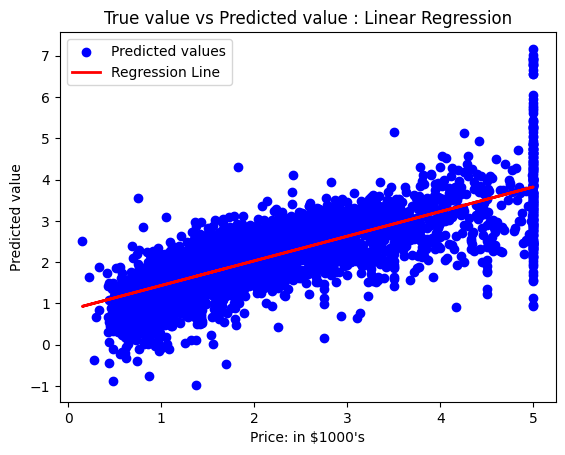

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

ytest = np.array(ytest).reshape(-1, 1)
y_pred = np.array(y_pred)

regressor = LinearRegression()
regressor.fit(ytest, y_pred)

m = regressor.coef_[0]
b = regressor.intercept_

y_line = m * ytest + b

plt.scatter(ytest, y_pred, c='blue', label='Predicted values')

plt.plot(ytest, y_line, color='red', linewidth=2, label='Regression Line')

plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs Predicted value : Linear Regression")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)
# Instead of accuracy_score, use metrics suitable for regression:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, y_pred)
print('R-squared of the model is =', r2)

Mean Square Error :  0.5289841670367247
Mean Absolute Error :  0.5351261336554748
R-squared of the model is = 0.5943232652466173


In [ ]:
from sklearn.neighbors import KNeighborsClassifier




knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN model:", accuracy_knn)


Accuracy of KNN model: 0.8601864181091877


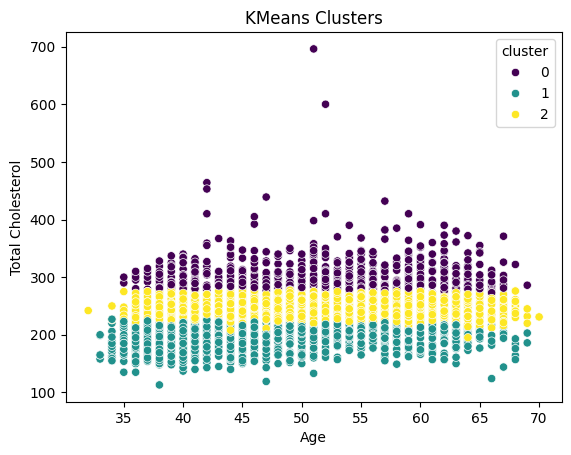

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=40)
kmeans.fit(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])


labels = kmeans.labels_
disease_df['cluster'] = labels

sns.scatterplot(x='age', y='totChol', hue='cluster', data=disease_df, palette='viridis')
plt.title('KMeans Clusters')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')
plt.show()

# KNN WITHOUT SKLEARN

In [ ]:
import numpy as np
import pandas as pd

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X_train, y_train, X_test, k=5):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]
        pred_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(pred_label)

    return np.array(y_pred)


y_pred = knn(X_train, y_train, X_test, k=5)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8601864181091877


# K-MEANS CLUSTERING

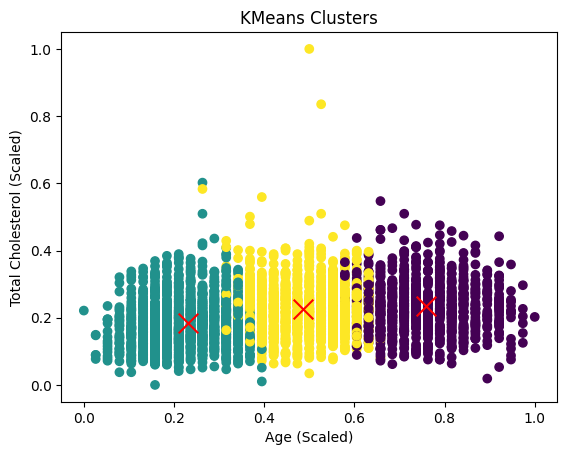

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def fit(self, X):
        random_indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            cluster_labels = self._assign_clusters(X)

            prev_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X, cluster_labels)

            if np.all(prev_centroids == self.centroids):
                break

    def predict(self, X):
        return self._assign_clusters(X)

    def _assign_clusters(self, X):
        cluster_labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in self.centroids]) for x in X])
        return cluster_labels

    def _update_centroids(self, X, cluster_labels):
        new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(self.k)])
        return new_centroids


X = disease_df[['age', 'totChol', 'sysBP', 'glucose']].values


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(k=3)
kmeans.fit(X_scaled)

cluster_labels = kmeans.predict(X_scaled)

disease_df['cluster'] = cluster_labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('Age (Scaled)')
plt.ylabel('Total Cholesterol (Scaled)')
plt.title('KMeans Clusters')
plt.show()

# **RANDOM FOREST WITH SKLEARN**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest model: {accuracy_rf}")

Accuracy of Random Forest model: 0.8708388814913449


# **RANDOM FOREST WITHOUT SKLEARN**

In [ ]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = self._entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0


        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r


        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])


class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feats=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                                max_depth=self.max_depth, n_feats=self.n_feats)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [self._most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


rf = RandomForest(n_trees=10, max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

acc = accuracy(y_test, y_pred_rf)
print(f"Accuracy of Random Forest model (manual implementation): {acc}")


Accuracy of Random Forest model (manual implementation): 0.8735019973368842


# **PRINCIPLE COMPONENT ANALISYS**

Explained variance ratio: [0.65009866 0.19206888]


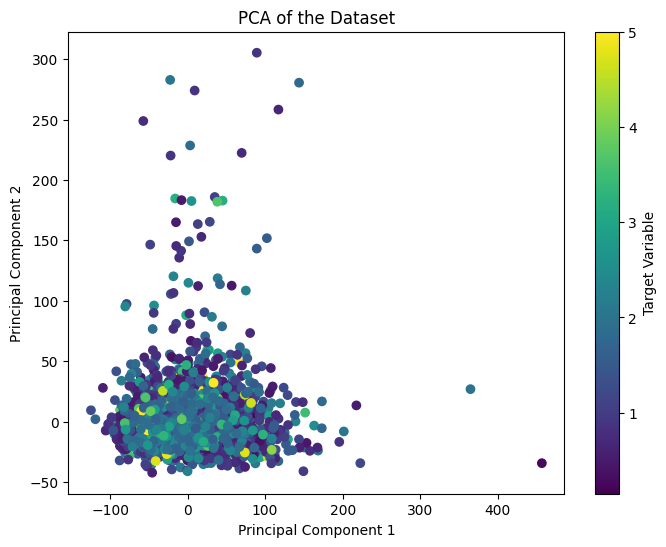

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Use the scaled X data

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

y_pca = y[:X_pca.shape[0]]  # Select the first 3751 elements of y to match X_pca

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of the Dataset")
plt.colorbar(label='Target Variable')
plt.show()